In [1]:
# 1. Preparación de Datos

In [2]:
## Carga de paquetes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Carga de datos
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')

df = pd.read_csv('TelecomX_datos_limpios.csv')
print(f'Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas')
df.head()

Dimensiones del dataset: 7043 filas x 24 columnas


,ID_Cliente,Churn,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios,Rango_Tenure
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,3,7-12 meses
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,2,7-12 meses
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1,0-6 meses
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,4,13-24 meses
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,2,0-6 meses


In [3]:
## Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Churn                   7043 non-null   object 
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   object 
 4   Tiene_Pareja            7043 non-null   object 
 5   Tiene_Dependientes      7043 non-null   object 
 6   Meses_Contrato          7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   object 
 8   Multiples_Lineas        7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Respaldo_Online         7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  TV_Streaming            7043 non-null   

In [4]:
# Verificar valores nulos
nulos = df.isnull().sum()
nulos[nulos > 0]

Rango_Tenure    11
dtype: int64

In [5]:
# Eliminar columnas irrelevantes
columnas_eliminar = ['ID_Cliente', 'Rango_Tenure']
df = df.drop(columns=columnas_eliminar)
print(f'Columnas restantes: {df.shape[1]}')
print(list(df.columns))

Columnas restantes: 22
['Churn', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Factura_Digital', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']


In [6]:
# Encoding de variables categóricas

# Estandarizar Adulto_Mayor: 'Sí' -> 'Yes', 'No' -> 'No'
df['Adulto_Mayor'] = df['Adulto_Mayor'].replace({'Sí': 'Yes'})

# Codificación binaria para la variable objetivo
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Variables binarias (Yes/No) -> 1/0
cols_binarias = [
    'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes',
    'Servicio_Telefonico', 'Factura_Digital'
]

mapeo_binario = {
    'Genero': {'Male': 1, 'Female': 0},
    'Adulto_Mayor': {'Yes': 1, 'No': 0},
    'Tiene_Pareja': {'Yes': 1, 'No': 0},
    'Tiene_Dependientes': {'Yes': 1, 'No': 0},
    'Servicio_Telefonico': {'Yes': 1, 'No': 0},
    'Factura_Digital': {'Yes': 1, 'No': 0},
}

for col, mapeo in mapeo_binario.items():
    df[col] = df[col].map(mapeo)

print('Variables binarias codificadas correctamente.')
df[cols_binarias].head()

Variables binarias codificadas correctamente.


,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Servicio_Telefonico,Factura_Digital
0,0,0,1,1,1,1
1,1,0,0,0,1,0
2,1,0,0,0,1,1
3,1,1,1,0,1,1
4,0,1,1,0,1,1


In [7]:
# One-Hot Encoding para variables categóricas con múltiples categorías
cols_onehot = [
    'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
    'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
    'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Metodo_Pago'
]

df = pd.get_dummies(df, columns=cols_onehot, drop_first=True, dtype=int)

print(f'Dimensiones después del encoding: {df.shape}')
print(f'\nColumnas resultantes ({df.shape[1]}):')
for i, col in enumerate(df.columns):
    print(f'  {i+1}. {col}')

Dimensiones después del encoding: (7043, 33)

Columnas resultantes (33):
  1. Churn
  2. Genero
  3. Adulto_Mayor
  4. Tiene_Pareja
  5. Tiene_Dependientes
  6. Meses_Contrato
  7. Servicio_Telefonico
  8. Factura_Digital
  9. Cargo_Mensual
  10. Cargo_Total
  11. Cargo_Diario
  12. Cantidad_Servicios
  13. Multiples_Lineas_No phone service
  14. Multiples_Lineas_Yes
  15. Servicio_Internet_Fiber optic
  16. Servicio_Internet_No
  17. Seguridad_Online_No internet service
  18. Seguridad_Online_Yes
  19. Respaldo_Online_No internet service
  20. Respaldo_Online_Yes
  21. Proteccion_Dispositivo_No internet service
  22. Proteccion_Dispositivo_Yes
  23. Soporte_Tecnico_No internet service
  24. Soporte_Tecnico_Yes
  25. TV_Streaming_No internet service
  26. TV_Streaming_Yes
  27. Peliculas_Streaming_No internet service
  28. Peliculas_Streaming_Yes
  29. Tipo_Contrato_One year
  30. Tipo_Contrato_Two year
  31. Metodo_Pago_Credit card (automatic)
  32. Metodo_Pago_Electronic check
  33. 

In [8]:
# Validar que no quedan variables categóricas
cats_restantes = df.select_dtypes(include='object').columns.tolist()
print(f'Variables categóricas restantes: {cats_restantes if cats_restantes else "Ninguna"}')
print(f'\nTipos de datos:\n{df.dtypes.value_counts()}')

Variables categóricas restantes: Ninguna

Tipos de datos:
int64      30
float64     3
Name: count, dtype: int64


=== Distribución de Churn ===
No cancelaron (0): 5,174 clientes (73.5%)
Cancelaron (1):    1,869 clientes (26.5%)

Ratio desbalance: 2.77:1


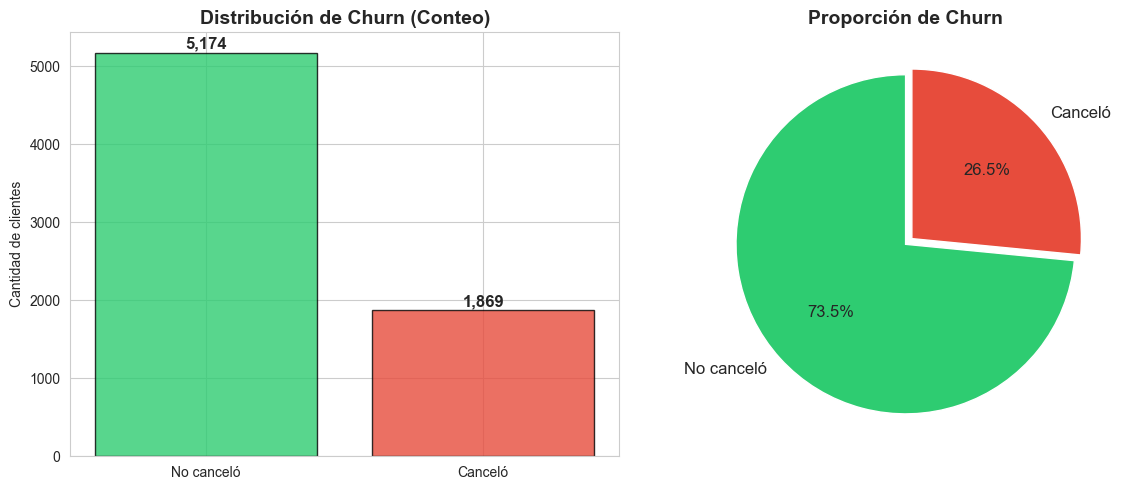


Conclusión: Existe un desbalance moderado (26.5% vs 73.5%).
Es recomendable aplicar técnicas de balanceo para mejorar la predicción de la clase minoritaria.


In [9]:
# 1.4 Vaerificación de cancelación
# Proporción de cancelación
churn_counts = df['Churn'].value_counts()
churn_prop = df['Churn'].value_counts(normalize=True) * 100

print('=== Distribución de Churn ===')
print(f'No cancelaron (0): {churn_counts[0]:,} clientes ({churn_prop[0]:.1f}%)')
print(f'Cancelaron (1):    {churn_counts[1]:,} clientes ({churn_prop[1]:.1f}%)')
print(f'\nRatio desbalance: {churn_counts[0]/churn_counts[1]:.2f}:1')

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#2ecc71', '#e74c3c']
labels = ['No canceló', 'Canceló']

# Gráfico de barras
axes[0].bar(labels, churn_counts.values, color=colors, edgecolor='black', alpha=0.8)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold', fontsize=12)
axes[0].set_title('Distribución de Churn (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cantidad de clientes')

# Gráfico de torta
axes[1].pie(churn_counts.values, labels=labels, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0, 0.05),
            textprops={'fontsize': 12})
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('01_distribucion_churn.png', bbox_inches='tight', dpi=150)
plt.show()

print(f'\nConclusión: Existe un desbalance moderado ({churn_prop[1]:.1f}% vs {churn_prop[0]:.1f}%).'
      f'\nEs recomendable aplicar técnicas de balanceo para mejorar la predicción de la clase minoritaria.')

